# 🌍 SDG 13: Climate Action – Predicting GHG Emissions
**Objective**: Predict greenhouse gas (GHG) emissions (CO2eq) using historical and demographic data.  
**Approach**: Supervised Machine Learning using Random Forest Regressor.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


## 📥 Load Dataset


In [4]:
df = pd.read_csv("D:\Downloads\FAO_EMSTOT.csv")
df = df[['REF_AREA_LABEL', 'URBANISATION_LABEL', 'COMP_BREAKDOWN_1_LABEL',
         'COMP_BREAKDOWN_2_LABEL', 'TIME_PERIOD', 'OBS_VALUE']].dropna()
df.head()


,REF_AREA_LABEL,URBANISATION_LABEL,COMP_BREAKDOWN_1_LABEL,COMP_BREAKDOWN_2_LABEL,TIME_PERIOD,OBS_VALUE
0,Afghanistan,Total,Not Applicable,Not Applicable,1961,10783.7374
1,Afghanistan,Total,Not Applicable,Not Applicable,1962,10899.2453
2,Afghanistan,Total,Not Applicable,Not Applicable,1963,11258.7671
3,Afghanistan,Total,Not Applicable,Not Applicable,1964,11454.0975
4,Afghanistan,Total,Not Applicable,Not Applicable,1965,11717.5817


# 🧹 Preprocessing

In [5]:
X = df.drop('OBS_VALUE', axis=1)
y = df['OBS_VALUE']

categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')



## 🧠 Train Model


In [6]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


## 📊 Evaluation


In [7]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.4f}')


RMSE: 36318.83
MAE: 4330.32
R² Score: 0.9983


## 📈 Visualization


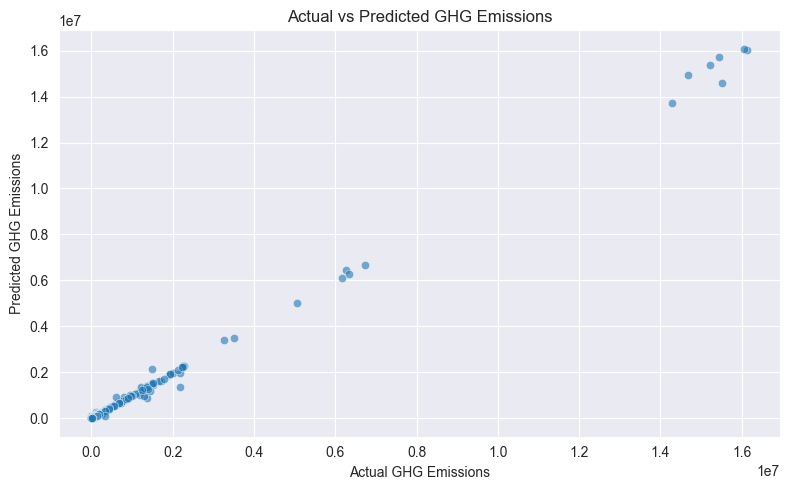

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual GHG Emissions')
plt.ylabel('Predicted GHG Emissions')
plt.title('Actual vs Predicted GHG Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()
